In [1]:
# Explore the methods (decision tree, random forests, bagging, and AdaBoost, gradient boost) for actor classification.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms

import seaborn as sns

from sklearn import tree
from sklearn.ensemble import IsolationForest, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

#import graphviz

0
1
2
3
4
5
6
7
8
9


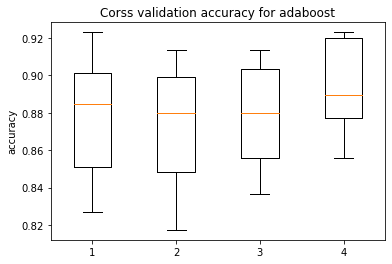


List of possible accuracy 1:
Maximum Accuracy That can be obtained from this model is: 92.3076923076923 %
Minimum Accuracy: 82.6923076923077 %
Overall Accuracy: 87.87714712471994 %
Standard Deviation is: 0.034174974071481214

List of possible accuracy 2:
Maximum Accuracy That can be obtained from this model is: 91.34615384615384 %
Minimum Accuracy: 81.73076923076923 %
Overall Accuracy: 87.29929051530993 %
Standard Deviation is: 0.03313440563712089

List of possible accuracy 3:
Maximum Accuracy That can be obtained from this model is: 91.34615384615384 %
Minimum Accuracy: 83.65384615384616 %
Overall Accuracy: 87.87528005974607 %
Standard Deviation is: 0.02970647776484783

List of possible accuracy 4:
Maximum Accuracy That can be obtained from this model is: 92.3076923076923 %
Minimum Accuracy: 85.57692307692307 %
Overall Accuracy: 89.41560866318147 %
Standard Deviation is: 0.02514328799342205


In [3]:
############
# AdaBoost #
############

# Load train.csv
csv = pd.read_csv('data/train.csv')

# 'Number of words lead', 'Year', 'Gross', 'Number of words lead', 'Mean Age Male', 'Mean Age Female'
X_csv = csv.drop(columns=['Lead', 'Mean Age Male', 'Gross', 'Year'])
y_csv = csv['Lead']

n_fold = 10
n_estimators_ada = 150

accuracy = np.zeros((n_fold, 4))

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=1)
lst_accu_stratified_1 = []
lst_accu_stratified_2 = []
lst_accu_stratified_3 = []
lst_accu_stratified_4 = []

for i, (train_index, val_index) in enumerate(skf.split(X_csv, y_csv)):
    
    print(i)
    
    X_train, X_val = X_csv.iloc[train_index], X_csv.iloc[val_index]
    y_train, y_val = y_csv.iloc[train_index], y_csv.iloc[val_index]
    
#     print(X_train.shape, y_train.shape)
#     print(X_val.shape, y_val.shape)
    
    # 1. Data Normalization
    X_train_normalized = preprocessing.normalize(X_train)
    # 2. Data Standardization
    X_train_standardized = preprocessing.scale(X_train)

    X_train_active = X_train_normalized
    
    X_val_normalized = preprocessing.normalize(X_val)
    X_val_standardized = preprocessing.scale(X_val)
    
    X_val_active = X_val_normalized
    
    # 1. Isolation Forest
    iso = IsolationForest(contamination=0.02)
    yhat = iso.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_1, y_train_ol_1 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_1.shape, y_train_ol_1.shape)

    model_ada_1 = AdaBoostClassifier(n_estimators=n_estimators_ada)
    model_ada_1.fit(X=X_train_ol_1, y=y_train_ol_1)
    y_predict_1 = model_ada_1.predict(X_val_active)
    
    accuracy[i, 0] = np.mean(y_predict_1 == y_val)
    lst_accu_stratified_1.append(model_ada_1.score(X_val_active, y_val))

    # 2. Minimum Covariance Determinant
    ee = EllipticEnvelope(contamination=0.02)
    yhat = ee.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_2, y_train_ol_2 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_2.shape, y_train_ol_2.shape)

    model_ada_2 = AdaBoostClassifier(n_estimators=n_estimators_ada)
    model_ada_2.fit(X=X_train_ol_2, y=y_train_ol_2)
    y_predict_2 = model_ada_2.predict(X_val_active)
    
    accuracy[i, 1] = np.mean(y_predict_2 == y_val)
    lst_accu_stratified_2.append(model_ada_2.score(X_val_active, y_val))

    # 3. Local Outlier Factor
    lof = LocalOutlierFactor(contamination=0.02)
    yhat = lof.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_3, y_train_ol_3 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_3.shape, y_train_ol_3.shape)

    model_ada_3 = AdaBoostClassifier(n_estimators=n_estimators_ada)
    model_ada_3.fit(X=X_train_ol_3, y=y_train_ol_3)
    y_predict_3 = model_ada_3.predict(X_val_active)
    
    accuracy[i, 2] = np.mean(y_predict_3 == y_val)
    lst_accu_stratified_3.append(model_ada_3.score(X_val_active, y_val))
    
    # 4. One-Class SVM
    ee = OneClassSVM(nu=0.02)
    yhat = ee.fit_predict(X_train_active)
    mask = yhat != -1
    X_train_ol_4, y_train_ol_4 = X_train_active[mask, :], y_train[mask]
    #print(X_train_ol_4.shape, y_train_ol_4.shape)
    
    model_ada_4 = AdaBoostClassifier(n_estimators=n_estimators_ada)
    model_ada_4.fit(X=X_train_ol_4, y=y_train_ol_4)
    y_predict_4 = model_ada_4.predict(X_val_active)
    
    accuracy[i, 3] = np.mean(y_predict_4 == y_val)
    lst_accu_stratified_4.append(model_ada_4.score(X_val_active, y_val))
    

    
plt.boxplot(accuracy)
plt.title('Corss validation accuracy for adaboost')
plt.xticks(np.arange(4) + 1, ('1', '2', '3', '4'))
plt.ylabel('accuracy')
plt.show()
    
# Print the output.
print('\nList of possible accuracy 1:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_1)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_1)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_1)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_1))

print('\nList of possible accuracy 2:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_2)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_2)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_2)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_2))

print('\nList of possible accuracy 3:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_3)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_3)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_3)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_3))

print('\nList of possible accuracy 4:')
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_4)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_4)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_4)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_4))